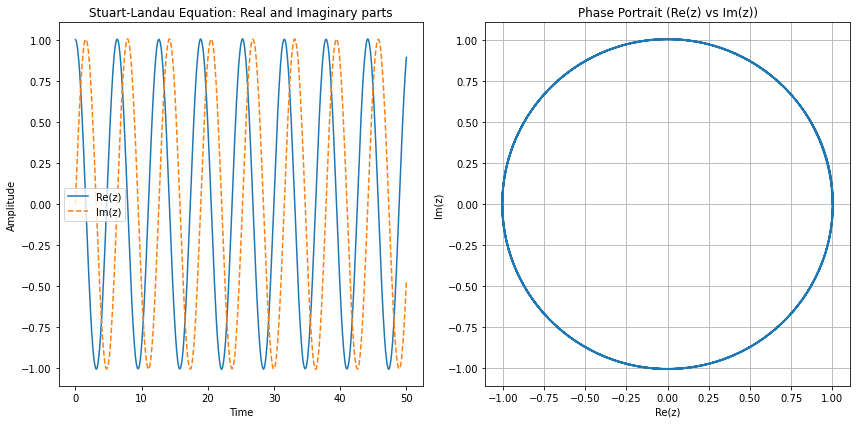

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the Stuart-Landau equation
def stuart_landau(t, z, mu, omega, beta):
    """
    Stuart-Landau equation:
    dz/dt = (mu + i*omega) * z - beta * |z|^2 * z

    Parameters:
    t: time (not used explicitly, required by solve_ivp)
    z: complex variable
    mu: growth rate parameter
    omega: frequency parameter
    beta: nonlinear saturation parameter

    Returns:
    dz/dt: time derivative of z
    """
    return (mu + 1j * omega) * z - beta * np.abs(z)**2 * z

# Parameters (Adjustable)
mu = 1.0       # Growth rate
omega = 1.0    # Natural frequency
beta = 1.0     # Nonlinear saturation

# Initial conditions
z0 = 1 + 0j    # Initial condition for z (complex)

# Time range for the solution
t_span = (0, 50)       # Start and end time
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Time points where the solution is evaluated

# Solve the equation using solve_ivp
sol = solve_ivp(stuart_landau, t_span, [z0], args=(mu, omega, beta), t_eval=t_eval)

# Extract solution (real and imaginary parts)
z_real = sol.y[0].real
z_imag = sol.y[0].imag

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the real and imaginary parts of z
plt.subplot(1, 2, 1)
plt.plot(sol.t, z_real, label='Re(z)')
plt.plot(sol.t, z_imag, label='Im(z)', linestyle='--')
plt.title('Stuart-Landau Equation: Real and Imaginary parts')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot the phase portrait (trajectory in the complex plane)
plt.subplot(1, 2, 2)
plt.plot(z_real, z_imag)
plt.title('Phase Portrait (Re(z) vs Im(z))')
plt.xlabel('Re(z)')
plt.ylabel('Im(z)')
plt.grid()

plt.tight_layout()
plt.show()

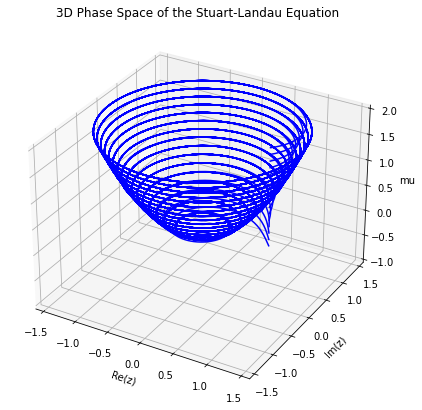

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# Define the Stuart-Landau equation
def stuart_landau(t, z, mu, omega, beta):
    """
    Stuart-Landau equation:
    dz/dt = (mu + i*omega) * z - beta * |z|^2 * z
    """
    return (mu + 1j * omega) * z - beta * np.abs(z)**2 * z

# Parameters (Adjustable)
omega = 1.0    # Natural frequency
beta = 1.0     # Nonlinear saturation

# Initial conditions
z0 = 1 + 0j    # Initial condition for z (complex)

# Time range for the solution
t_span = (0, 50)       # Start and end time
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Time points where the solution is evaluated

# Range of mu values (from negative to positive)

mu_start = -1
mu_stop  = 2
mu_num   = 25


mu_values = np.linspace(mu_start, mu_stop, mu_num)  # Adjust the range and number of mu values here

# Prepare to store results for 3D plot
z_real_all = []
z_imag_all = []
mu_all = []


# Solve the equation for each mu
for mu in mu_values:
    sol = solve_ivp(stuart_landau, t_span, [z0], args=(mu, omega, beta), t_eval=t_eval)
    z_real_all.append(sol.y[0].real)
    z_imag_all.append(sol.y[0].imag)
    mu_all.append(np.full_like(sol.t, mu))  # Fill an array with the current mu value

    
# Convert to arrays for plotting
z_real_all = np.array(z_real_all)
z_imag_all = np.array(z_imag_all)
mu_all = np.array(mu_all)


# Create a 3D plot of the phase space
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot real(z), imaginary(z), and mu in 3D
for i in range( len(mu_values) ):
    
    if mu_values[i] < 0:
        ax.plot(z_real_all[i][-1] , z_imag_all[i][-1] , mu_all[i][-1] , 'b'  )
    
    if mu_values[i] > 0:
        ax.plot(z_real_all[i]     , z_imag_all[i]     , mu_all[i]     , 'b'  )
        
    

ax.set_title('3D Phase Space of the Stuart-Landau Equation')
ax.set_xlabel('Re(z)')
ax.set_ylabel('Im(z)')
ax.set_zlabel('mu')


# ax.view_init(elev=-120, azim=0)
# ax.view_init(elev=0, azim=0)


plt.show()





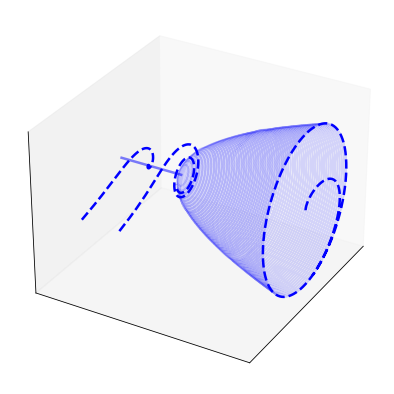

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# Define the Stuart-Landau equation
def stuart_landau(t, z, mu, omega, beta):
    """
    Stuart-Landau equation:
    dz/dt = (mu + i*omega) * z - beta * |z|^2 * z
    """
    return (mu + 1j * omega) * z - beta * np.abs(z)**2 * z

# Parameters (Adjustable)
omega = 1.0    # Natural frequency
beta = 1.0     # Nonlinear saturation

# Initial conditions
z0 = 2 + 0j    # Initial condition for z (complex)

# Time range for the solution
t_start = 0
t_stop  = 100
t_num   = 2000
t_span = (t_start, t_stop)       # Start and end time
t_eval = np.linspace(t_span[0], t_span[1], t_num)  # Time points where the solution is evaluated

# Range of mu values (from negative to positive)

mu_start = -1
mu_stop  = 2
mu_num   = 100


mu_values = np.linspace(mu_start, mu_stop, mu_num)  # Adjust the range and number of mu values here

# Prepare to store results for 3D plot
z_real_all = []
z_imag_all = []
mu_all = []


# Solve the equation for each mu
for mu in mu_values:
    sol = solve_ivp(stuart_landau, t_span, [z0], args=(mu, omega, beta), t_eval=t_eval)
    z_real_all.append(sol.y[0].real)
    z_imag_all.append(sol.y[0].imag)
    mu_all.append(np.full_like(sol.t, mu))  # Fill an array with the current mu value

    
# Convert to arrays for plotting
z_real_all = np.array(z_real_all)
z_imag_all = np.array(z_imag_all)
mu_all = np.array(mu_all)


# Create a 3D plot of the phase space
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot real(z), imaginary(z), and mu in 3D

# Manually plot the straight line for mu<0
ax.plot( [0,0] , [mu_start,0] , [0,0] , 'b' , linewidth = 2.5 , alpha = 0.5 )

for i in range( len(mu_values) ):
    
    if mu_values[i] < 0:  continue
    
    if mu_values[i] > 0:
        ax.plot(z_real_all[i][-200:] ,  mu_all[i][-200:] ,  z_imag_all[i][-200:] ,  'b' ,  alpha = 0.15 )
    

# Manually plot a few trajectories
# ax.plot(z_real_all[0]  ,  mu_all[0]  ,   z_imag_all[0]  ,  'b--' , linewidth = 2.5 )
# ax.plot(z_real_all[50] ,  mu_all[50] ,   z_imag_all[50] ,  'b--' , linewidth = 2.5 )
# ax.plot(z_real_all[75] ,  mu_all[75] ,   z_imag_all[75] ,  'b--' , linewidth = 2.5 )


# ax.plot(z_real_all[29]  ,  mu_all[29]  ,   z_imag_all[29]  ,  'b--' , linewidth = 2.5 )
# ax.plot(z_real_all[62][:150]  ,  mu_all[62][:150]  ,   z_imag_all[62][:150]  ,  'b--' , linewidth = 2.5 )



ax.plot(z_real_all[15]  ,  mu_all[15]  ,   z_imag_all[15]  ,  'b--' , linewidth = 2.5 )
ax.plot(z_real_all[35][:250]  ,  mu_all[35][:250]  ,   z_imag_all[35][:250]  ,  'b--' , linewidth = 2.5 )




# ax.set_title('3D Phase Space of the Stuart-Landau Equation')
# ax.set_xlabel('Re(A)')
# ax.set_ylabel('$\lambda$')
# ax.set_zlabel('Im(A)')


ax.set_xticks([])  
ax.set_yticks([])  
ax.set_zticks([])  



ax.view_init(elev=30, azim=30)




###  Plot a trajectory from the inside out

# new_last_mu = 1.75
new_last_mu = mu_stop

sol_new = solve_ivp(stuart_landau, (0,10) , [0.01 + 0.01j], args=(new_last_mu, omega, beta), t_eval=np.linspace(0, 10, 500) )

ax.plot( sol_new.y[0].real ,  np.ones((len(sol_new.y[0].real),))*new_last_mu ,   sol_new.y[0].imag ,  'b--' , linewidth = 2.5 )





plt.show()





In [35]:
mu_stop

2

In [34]:
mu

2.0